In [ ]:
#Implementation of a CNN for MGR on the GTZAN dataset
#TMM4128 Maskinlæring for ingeniører
#Group 16

In [1]:
#REQUIRED PACKAGES 
#!pip install tensorflow matplotlib scikit-learn seaborn

#LIBRARIES USED
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\simen\AppData\Local\Temp\ipykernel_13720\3089957196.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#FUNCTION BUILDING THE MODEL
def build_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=75, padding='same', strides=2, kernel_size=2, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

#PLOTTING PERFORMANCE
def plot_metrics(history):
    plt.figure()
    plt.plot(history.history["loss"], label="Train Loss", color="black")
    plt.plot(history.history["val_loss"], label="Validation Loss", color="darkred", marker="+", linestyle="dashed", markeredgecolor="purple", markeredgewidth=2)
    plt.title("Model Loss", color="darkred", size=13)
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(history.history["accuracy"], label="Train Accuracy", color="black")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="darkred", marker="+", linestyle="dashed", markeredgecolor="purple", markeredgewidth=2)
    plt.title("Model Accuracy", color="darkred", size=13)
    plt.legend()
    plt.show()

In [3]:
#PREPARING MODEL FOR GTZAN DATA AND TUNING HYPERPARAMETERS
base_dir = "C:\\Users\\simen\\gtzan_data\\images_original"
IMAGE_WIDTH = 432
IMAGE_HEIGHT = 288
BATCH_SIZE = 75
NUM_CLASSES = 10
EPOCHS = 20

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.1,  
    rescale=1./255
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=42
)

test_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=42
)

#PLOT RESCALED (NOMRALIZED) SPECTROGRAMS (optional)
#images, labels = next(train_generator)
#plt.figure(figsize=(10, 10))
#for i in range(len(images)):
#    plt.subplot(5, 5, i + 1)
#    plt.imshow(images[i])
#    plt.title(f"Label: {labels[i]}")
#    plt.axis("off")
#plt.show()

Found 900 images belonging to 10 classes.
Found 99 images belonging to 10 classes.


In [4]:
#FINALIZE MODEL
model = build_model(input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3), num_classes=NUM_CLASSES)
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\simen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20


C:\Users\simen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 542ms/step - accuracy: 0.1100 - loss: 33.9253 - val_accuracy: 0.1616 - val_loss: 25.0769
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 433ms/step - accuracy: 0.1670 - loss: 16.3855 - val_accuracy: 0.1515 - val_loss: 6.8744
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 525ms/step - accuracy: 0.2385 - loss: 4.6794 - val_accuracy: 0.1919 - val_loss: 3.0308
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 507ms/step - accuracy: 0.4674 - loss: 1.8330 - val_accuracy: 0.2828 - val_loss: 1.9051
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 456ms/step - accuracy: 0.7331 - loss: 1.1645 - val_accuracy: 0.4040 - val_loss: 1.6358
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 474ms/step - accuracy: 0.8643 - loss: 0.8665 - val_accuracy: 0.4949 - val_loss: 1.4412
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 466ms/step - accuracy: 0.9237 - loss: 0.5981 - val_accuracy: 0.5253 - val_loss: 1.4808
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 486ms/step - accuracy: 0.9662 - loss: 0.3700 - val_accuracy: 0.5051 - 

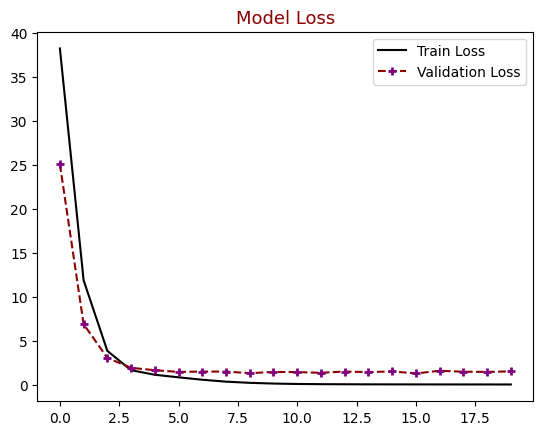

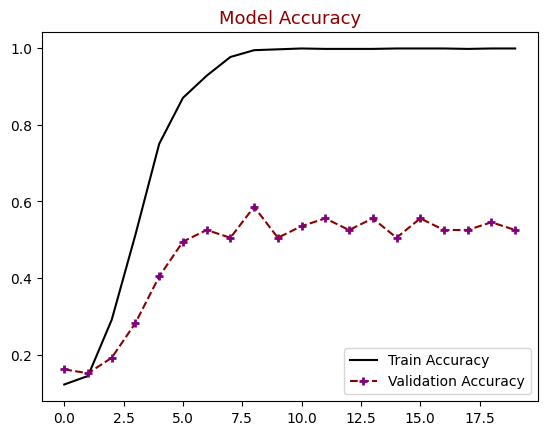

In [5]:
#RUN THE MODEL AND PLOT ITS PERFORMANCE
history = model.fit(train_generator, epochs=EPOCHS, validation_data=test_generator)
plot_metrics(history)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5279 - loss: 1.5738
Accuracy of the model is -->  52.52525210380554 %
Loss of the model is -->  1.6668314933776855
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.20      0.29        10
           1       0.07      0.10      0.08        10
           2       0.25      0.30      0.27        10
           3       0.17      0.10      0.12        10
           4       0.18      0.20      0.19        10
           5       0.00      0.00      0.00         9
           6       0.18      0.30      0.22        10
           7       0.12      0.10      0.11        10
           8       0.15      0.20      0.17        10
           9       0.14      0.10      0.12        10

    accuracy                           0.16        99
   macro avg       0.18      0.16      0.16        99
weighted avg       0.18      0.16      0.16        99



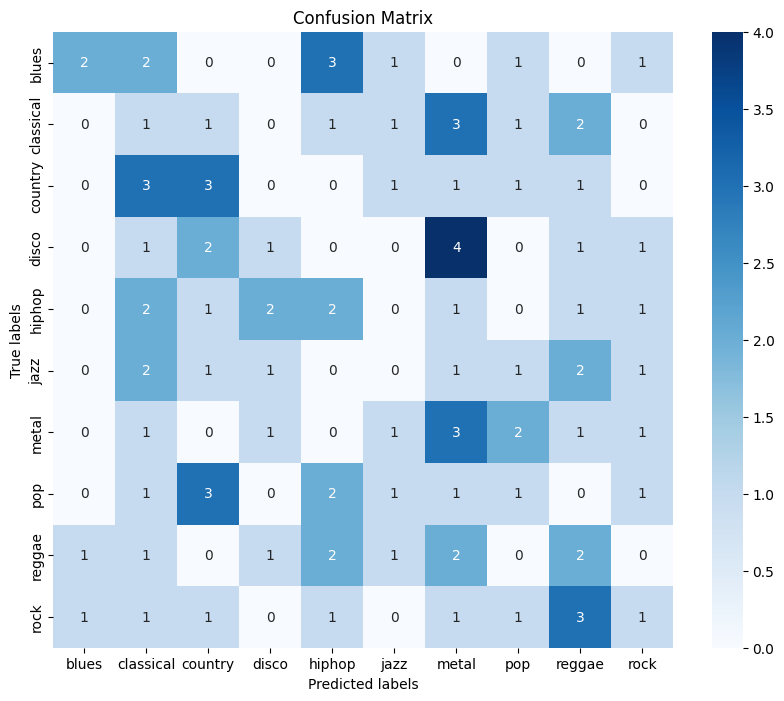

In [6]:
#ADDITIONAL PERFORMANCE METRICS
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=BATCH_SIZE)
print("Accuracy of the model is --> ", test_accuracy * 100, "%")
print("Loss of the model is --> ", test_loss)

y_pred = model.predict(test_generator).argmax(axis=1)
y_true = test_generator.classes

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_true, y_pred, class_names=test_generator.class_indices.keys())